In [1]:
#List of dependencies - Use as needed
                #Refer to week 6 notes
# import requests                 # Used for APIs
from config import api_key      # file with API key
# import time                     # Used for APIs to expand time between each hit
# import json                     # Used for APIs
# import pprint                   # Formatting for JSON files

        #Refer to week 5 notes
#%matplotlib widget - Allows for multiple instances of same plot
import matplotlib.pyplot as plt # Create plots
import numpy as np # mathematical manipulations
from scipy import stats as st #- stats and probability

        #Refer to week 4 notes
from pathlib import Path # Link to csv-files
import pandas as pd # Read csv files
import os

## Setting up temperature and rainfall CSVs

In [2]:
#Dubbo Temp

csvpath = os.path.join('.','Resources', 'Dubbo_NSW_BOM', 'Dubbo_Anuual_Mean_Max_Temp.csv')
df_1 = pd.read_csv(csvpath)
df_1= df_1[['Year','Annual']]

#Dubbo Rain
csvpath = os.path.join('.','Resources', 'Dubbo_NSW_BOM', 'Dubbo_Annual_Rainfall.csv')
df_2 = pd.read_csv(csvpath)
df_2 = df_2[['Year','Annual']]

#Cairns Temp
csvpath = os.path.join('.','Resources', 'Cairns_QL_BOM', 'Cairns_Annual_Mean_Max_Temp.csv')
df_3= pd.read_csv(csvpath)
df_3= df_3[['Year','Annual']]

#Cairns Rain
csvpath = os.path.join('.','Resources', 'Cairns_QL_BOM', 'Cairns_Annual_Rainfall.csv')
df_4 = pd.read_csv(csvpath)
df_4 = df_4[['Year','Annual']]

#Wangaratta Temp
csvpath = os.path.join('.','Resources', 'Wangaratta_VIC_BOM', 'Wangaratta_Annual_Mean_Max_Temp.csv')
df_5= pd.read_csv(csvpath)
df_5 = df_5[['Year','Annual']]

#Wangaratta Rain
csvpath = os.path.join('.','Resources', 'Wangaratta_VIC_BOM', 'Wangaratta_Annual_Rain.csv')
df_6 = pd.read_csv(csvpath)
df_6= df_6[['Year','Annual']]

#Coffin Bay SA Temp Note: Wanilla closest location found
csvpath = os.path.join('.','Resources', 'CoffinBay_SA_BOM', 'Wanilla_Annual_Mean_Max_Temp.csv')
df_7 = pd.read_csv(csvpath)
df_7 = df_7[['Year','Annual']]

#Coffin Bay SA Rain Note: Wanilla closest location found
csvpath = os.path.join('.','Resources', 'CoffinBay_SA_BOM', 'Wanilla_Annual_Rainfall.csv')
df_8 = pd.read_csv(csvpath)
df_8 = df_8[['Year','Annual']]

#Northam WA Temp
csvpath = os.path.join('.','Resources', 'Northam_WA_BOM', 'Northam_Annual_Mean_Max_Temp.csv')
df_9 = pd.read_csv(csvpath)
df_9 = df_9[['Year','Annual']]

#Northam WA Rain
csvpath = os.path.join('.','Resources', 'Northam_WA_BOM', 'Northam_Annual_Rainfall.csv')
df_10 = pd.read_csv(csvpath)
df_10 = df_10[['Year','Annual']]



## Merging and cleaning Temp and Rainfall CSVs

In [3]:
Initial_merge = pd.merge(df_1, df_2, how="left", on=['Year'])
Initial_merge = Initial_merge.rename(columns= {"Annual_x":"NSW Annual Max Mean Temp",
                                                "Annual_y":"NSW Annual Rainfall"})

Second_merge = pd.merge(Initial_merge, df_3, how="left", on=['Year'])
Second_merge = Second_merge.rename(columns= {"Annual":"QL Annual Max Mean Temp"})

Third_merge = pd.merge(Second_merge, df_4, how="left", on=['Year'])
Third_merge = Third_merge.rename(columns= {"Annual":"QL Annual Rainfall"})

Fourth_merge = pd.merge(Third_merge, df_5, how="left", on=['Year'])
Fourth_merge = Fourth_merge.rename(columns= {"Annual":"VIC Annual Max Mean Temp"})

Fifth_merge = pd.merge(Fourth_merge, df_6, how="left", on=['Year'])
Fifth_merge = Fifth_merge.rename(columns= {"Annual":"VIC Annual Rainfall"})

Sixth_merge = pd.merge(Fifth_merge, df_7, how="left", on=['Year'])
Sixth_merge = Sixth_merge.rename(columns= {"Annual":"SA Annual Max Mean Temp"})

Seventh_merge = pd.merge(Sixth_merge, df_8, how="left", on=['Year'])
Seventh_merge = Seventh_merge.rename(columns= {"Annual":"SA Annual Rainfall"})

Eight_merge = pd.merge(Seventh_merge, df_9, how="left", on=['Year'])
Eight_merge = Eight_merge.rename(columns= {"Annual":"WA Annual Max Mean Temp"})

Temp_Rain_df = pd.merge(Eight_merge, df_10, how="left", on=['Year'])
Temp_Rain_df= Temp_Rain_df.rename(columns= {"Annual":"WA Annual Rainfall"})
Temp_Rain_df.head()


,Year,NSW Annual Max Mean Temp,NSW Annual Rainfall,QL Annual Max Mean Temp,QL Annual Rainfall,VIC Annual Max Mean Temp,VIC Annual Rainfall,SA Annual Max Mean Temp,SA Annual Rainfall,WA Annual Max Mean Temp,WA Annual Rainfall
0,1993,23.4,NaN,28.8,1574.2,21.1,856.8,21.9,NaN,25.4,320.9
1,1994,24.3,NaN,29.1,1990.4,21.8,485.5,21.8,NaN,27.0,282.2
2,1995,23.6,NaN,29.4,2074.8,20.7,824.9,20.3,379.8,25.6,554.4
3,1996,23.3,NaN,29.3,2083.0,20.6,781.1,20.3,364.0,25.6,478.1
4,1997,25.0,NaN,28.6,1899.8,22.8,385.0,20.6,349.2,25.4,394.6


In [4]:
#Fill in NA values close to max year (Average of 2 prior years) **Note- AI assisted
df_filled = Temp_Rain_df.fillna((Temp_Rain_df.shift() + Temp_Rain_df.shift(-1)) / 2)
rolling_mean = df_filled.rolling(3, min_periods=1).mean().shift(2)
filled_df = df_filled.fillna(rolling_mean.round())
filled_df.head()

,Year,NSW Annual Max Mean Temp,NSW Annual Rainfall,QL Annual Max Mean Temp,QL Annual Rainfall,VIC Annual Max Mean Temp,VIC Annual Rainfall,SA Annual Max Mean Temp,SA Annual Rainfall,WA Annual Max Mean Temp,WA Annual Rainfall
0,1993,23.4,NaN,28.8,1574.2,21.1,856.8,21.9,NaN,25.4,320.9
1,1994,24.3,NaN,29.1,1990.4,21.8,485.5,21.8,NaN,27.0,282.2
2,1995,23.6,NaN,29.4,2074.8,20.7,824.9,20.3,379.8,25.6,554.4
3,1996,23.3,NaN,29.3,2083.0,20.6,781.1,20.3,364.0,25.6,478.1
4,1997,25.0,NaN,28.6,1899.8,22.8,385.0,20.6,349.2,25.4,394.6


## Creating year specific temp and rainfall DF (2000 onwards) for 1.4 and 1.5, (2017 onwards) for 2.4 and 2.5

In [67]:
#Creating rainfall specific DataFrame (usable from 2000 onwards)
rainfall_df = filled_df[['Year', 'NSW Annual Rainfall', 'QL Annual Rainfall', 'VIC Annual Rainfall', 'SA Annual Rainfall', 'WA Annual Rainfall']]
rain_df_2000 = rainfall_df[rainfall_df['Year'] > 1999]
rain_df_2000.head()

#Creating rainfall specific DataFrame (usable from 2017 onwards)
rain_df_2017 = rainfall_df[rainfall_df['Year'] > 2016]

In [61]:
#Creating weather df
temp_df = filled_df[['Year', 'NSW Annual Max Mean Temp', 'QL Annual Max Mean Temp', 'VIC Annual Max Mean Temp', 'SA Annual Max Mean Temp', 'WA Annual Max Mean Temp']]
temp_df_2000 = temp_df.loc[temp_df['Year'] > 1999]
temp_df_2017 = temp_df.loc[temp_df['Year'] > 2016]
temp_df.head()
#temp_df_2017

,Year,NSW Annual Max Mean Temp,QL Annual Max Mean Temp,VIC Annual Max Mean Temp,SA Annual Max Mean Temp,WA Annual Max Mean Temp
0,1993,23.4,28.8,21.1,21.9,25.4
1,1994,24.3,29.1,21.8,21.8,27.0
2,1995,23.6,29.4,20.7,20.3,25.6
3,1996,23.3,29.3,20.6,20.3,25.6
4,1997,25.0,28.6,22.8,20.6,25.4


## State By State wheat production graphs

The following code produces graphs based on each state

In [7]:
# Reading the Wheat_StateByState.csv file
state_df = pd.read_csv("Resources/Wheat_StateByState_formatted.csv")

year_range = np.arange(1.0,8.0,1.0)
state_df

,Year,NSW_ha,NSW_kt,VIC_ha,VIC_kt,QLD_ha,QLD_kt,SA_ha,SA_kt,WA_ha,WA_kt,TAS_ha,TAS_kt
0,2017-18,2793.5,4702.8,1446.8,3682.1,639.2,765.4,1975.8,4052.0,4056.6,7698.6,7.4,40.3
1,2018-19,2382.0,1850.3,1402.9,2276.6,419.7,419.7,1820.8,3024.5,4369.2,9979.2,7.6,40.1
2,2019-20,2132.0,1772.4,1428.9,3714.3,441.5,418.5,1720.9,2689.1,4132.7,5842.2,7.2,43.8
3,2020-21,4037.0,12972.2,1413.4,4525.0,966.1,1594.2,1831.0,3982.2,4387.5,8792.7,8.2,56.3
4,2021-22,3607.7,12029.4,1444.6,4246.4,940.6,2222.4,2008.1,4750.1,4718.0,12919.1,9.3,70.0
5,2022-23,3600.0,10620.0,1500.0,5392.9,980.0,2600.0,2200.0,7350.0,4750.0,14500.0,15.0,82.5
6,2023-24,3300.0,6600.0,1540.4,4618.9,800.0,1100.0,2200.0,4900.0,4650.0,8150.0,12.0,85.0


## Temperature against wheat production (2.4)

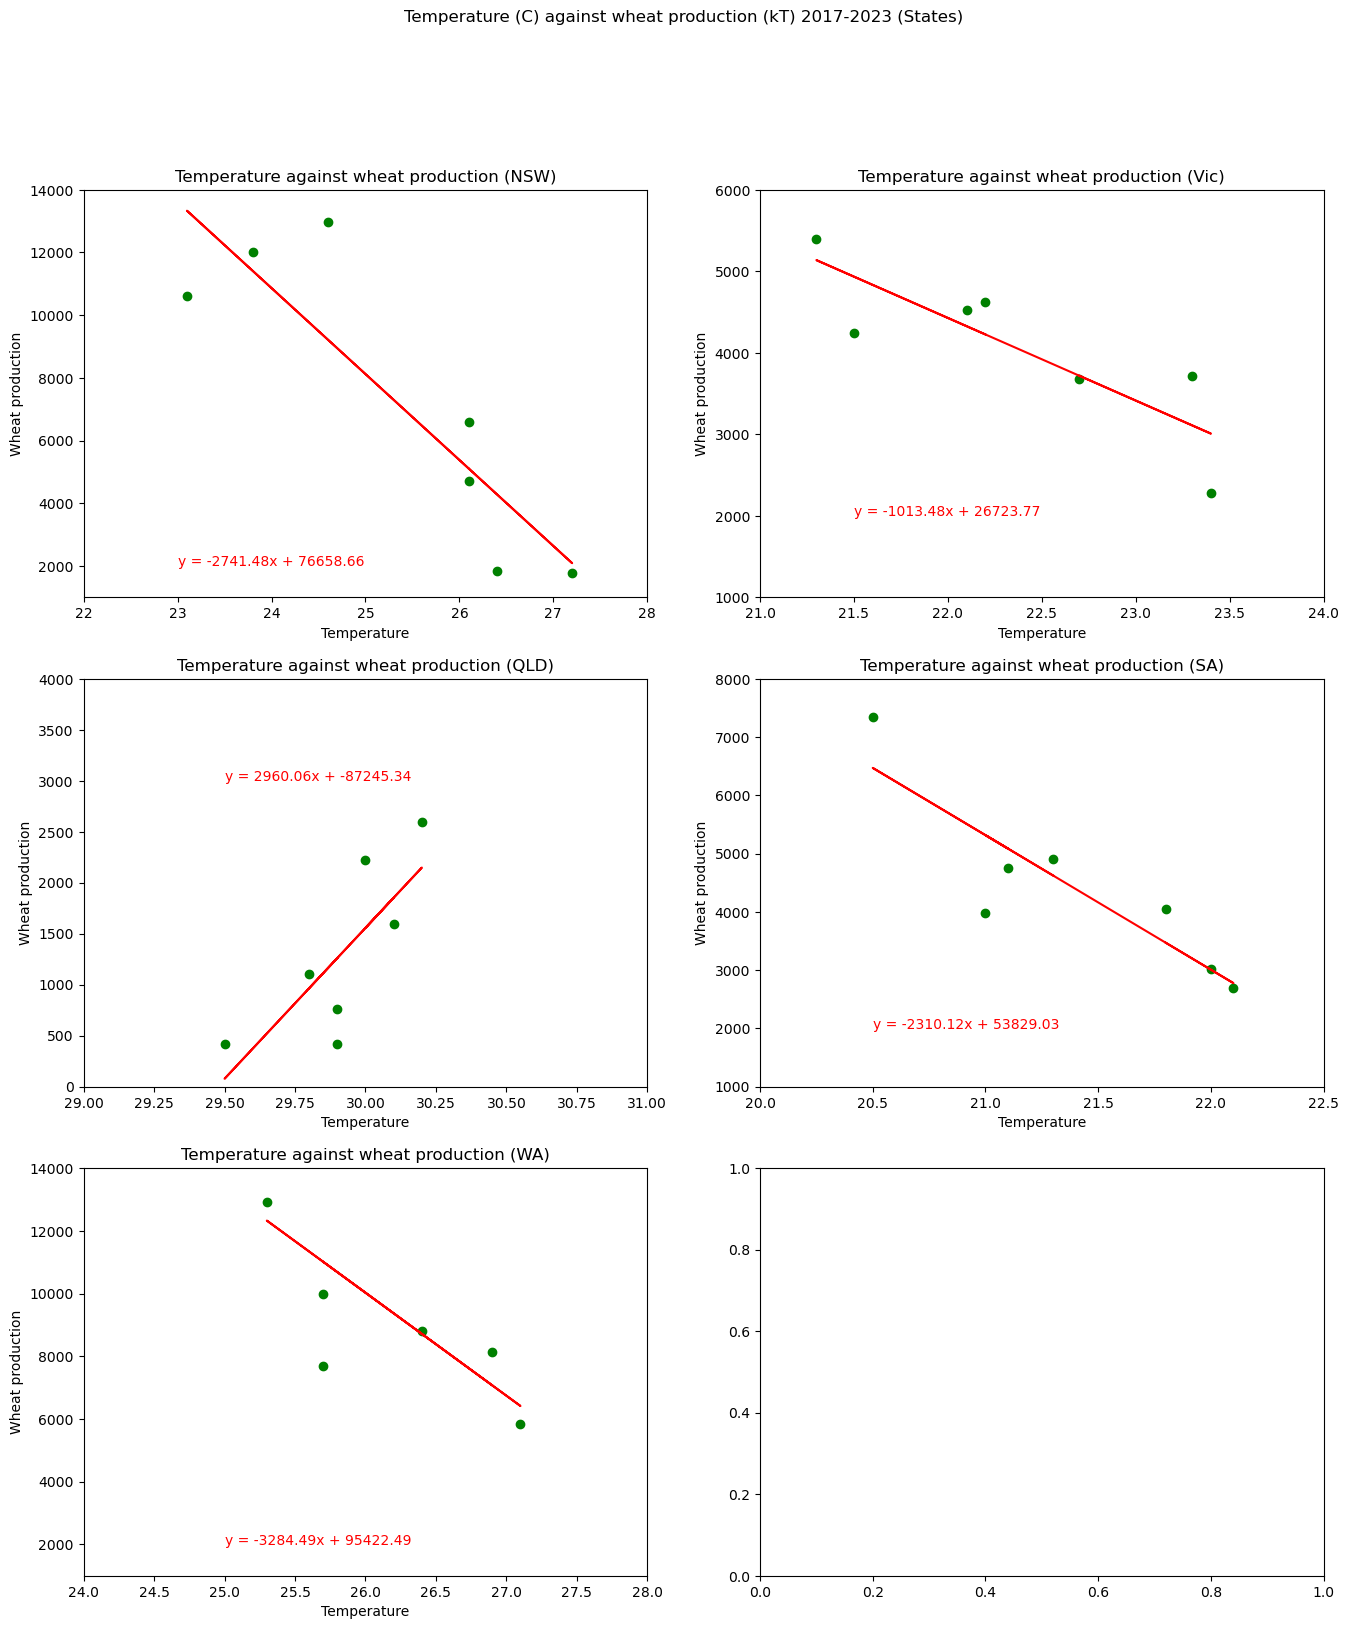

In [8]:
# Creating a multi plot with three rows and two columns
fig, axs = plt.subplots(3, 2)
fig.suptitle('Temperature (C) against wheat production (kT) 2017-2023 (States)')
fig.set_figheight(18)
fig.set_figwidth(16)

# NSW graph
# Creating a scatter graph with the year as the x value and yield as the y value
axs[0,0].scatter(temp_df_2017['NSW Annual Max Mean Temp'], state_df['NSW_kt'], c='green')
axs[0,0].set_title('Temperature against wheat production (NSW)')
axs[0,0].set_ylabel('Wheat production')
axs[0,0].set_xlabel('Temperature')
axs[0,0].set_xlim(22, 28)
axs[0,0].set_ylim(1000, 14000)

# NSW linear regression
nsw_x_values = temp_df_2017['NSW Annual Max Mean Temp']
nsw_y_values = state_df['NSW_kt']
(nsw_slope, nsw_intercept, nsw_rvalue, nsw_pvalue, nsw_stderr) = st.linregress(nsw_x_values, nsw_y_values)
nsw_regress = nsw_x_values * nsw_slope + nsw_intercept
axs[0,0].annotate(f"y = {round(nsw_slope,2)}x + {round(nsw_intercept,2)}", xy=(23,2000), xycoords='data', color='red')
axs[0,0].plot(nsw_x_values,nsw_regress,"r-")

#------

# VIC graph
axs[0,1].scatter(temp_df_2017['VIC Annual Max Mean Temp'], state_df['VIC_kt'], c='green')
axs[0,1].set_title('Temperature against wheat production (Vic)')
axs[0,1].set_ylabel('Wheat production')
axs[0,1].set_xlabel('Temperature')
axs[0,1].set_xlim(21, 24)
axs[0,1].set_ylim(1000, 6000)

# VIC linear regression
vic_x_values = temp_df_2017['VIC Annual Max Mean Temp']
vic_y_values = state_df['VIC_kt']
(vic_slope, vic_intercept, vic_rvalue, vic_pvalue, vic_stderr) = st.linregress(vic_x_values, vic_y_values)
vic_regress = vic_x_values * vic_slope + vic_intercept
axs[0,1].annotate(f"y = {round(vic_slope,2)}x + {round(vic_intercept,2)}", xy=(21.5,2000), xycoords='data', color='red')
axs[0,1].plot(vic_x_values,vic_regress,"r-")


#------
# QLD graph
axs[1,0].scatter(temp_df_2017['QL Annual Max Mean Temp'], state_df['QLD_kt'], c='green')
axs[1,0].set_title('Temperature against wheat production (QLD)')
axs[1,0].set_ylabel('Wheat production')
axs[1,0].set_xlabel('Temperature')
axs[1,0].set_xlim(29, 31)
axs[1,0].set_ylim(0, 4000)

# QLD linear regression (uncomment the section below once fixed)
qld_x_values = temp_df_2017['QL Annual Max Mean Temp']
qld_y_values = state_df['QLD_kt']
(qld_slope, qld_intercept, qld_rvalue, qld_pvalue, qld_stderr) = st.linregress(qld_x_values, qld_y_values)
qld_regress = qld_x_values * qld_slope + qld_intercept
axs[1,0].annotate(f"y = {round(qld_slope,2)}x + {round(qld_intercept,2)}", xy=(29.5,3000), xycoords='data', color='red')
axs[1,0].plot(qld_x_values,qld_regress,"r-")


#------
# SA graph
axs[1,1].scatter(temp_df_2017['SA Annual Max Mean Temp'], state_df['SA_kt'], c='green')
axs[1,1].set_title('Temperature against wheat production (SA)')
axs[1,1].set_ylabel('Wheat production')
axs[1,1].set_xlabel('Temperature')
axs[1,1].set_xlim(20, 22.5)
axs[1,1].set_ylim(1000, 8000)

# SA linear regression (uncomment the section below once fixed)
sa_x_values = temp_df_2017['SA Annual Max Mean Temp']
sa_y_values = state_df['SA_kt']
(sa_slope, sa_intercept, sa_rvalue, sa_pvalue, sa_stderr) = st.linregress(sa_x_values, sa_y_values)
sa_regress = sa_x_values * sa_slope + sa_intercept
axs[1,1].annotate(f"y = {round(sa_slope,2)}x + {round(sa_intercept,2)}", xy=(20.5,2000), xycoords='data', color='red')
axs[1,1].plot(sa_x_values,sa_regress,"r-")

#------

# WA graph
axs[2,0].scatter(temp_df_2017['WA Annual Max Mean Temp'], state_df['WA_kt'], c='green')
axs[2,0].set_title('Temperature against wheat production (WA)')
axs[2,0].set_ylabel('Wheat production')
axs[2,0].set_xlabel('Temperature')
axs[2,0].set_xlim(24, 28)
axs[2,0].set_ylim(1000, 14000)

# WA regression
wa_x_values = temp_df_2017['WA Annual Max Mean Temp']
wa_y_values = state_df['WA_kt']
(wa_slope, wa_intercept, wa_rvalue, wa_pvalue, wa_stderr) = st.linregress(wa_x_values, wa_y_values)
wa_regress = wa_x_values * wa_slope + wa_intercept
axs[2,0].annotate(f"y = {round(wa_slope,2)}x + {round(wa_intercept,2)}", xy=(25,2000), xycoords='data', color='red')
axs[2,0].plot(wa_x_values,wa_regress,"r-")

In [68]:
rain_df_2017

,Year,NSW Annual Rainfall,QL Annual Rainfall,VIC Annual Rainfall,SA Annual Rainfall,WA Annual Rainfall
24,2017,465.4,1663.1,593.0,378.6,536.10
25,2018,311.6,2795.3,689.0,293.6,405.15
26,2019,211.2,2100.0,343.4,261.8,274.20
27,2020,567.8,1495.8,549.6,485.0,286.60
28,2021,924.4,2484.8,647.6,419.8,638.40
29,2022,1028.8,2037.4,878.6,652.0,420.60
30,2023,425.8,2351.8,626.8,389.0,268.70


## Rainfall against wheat production (2.5)

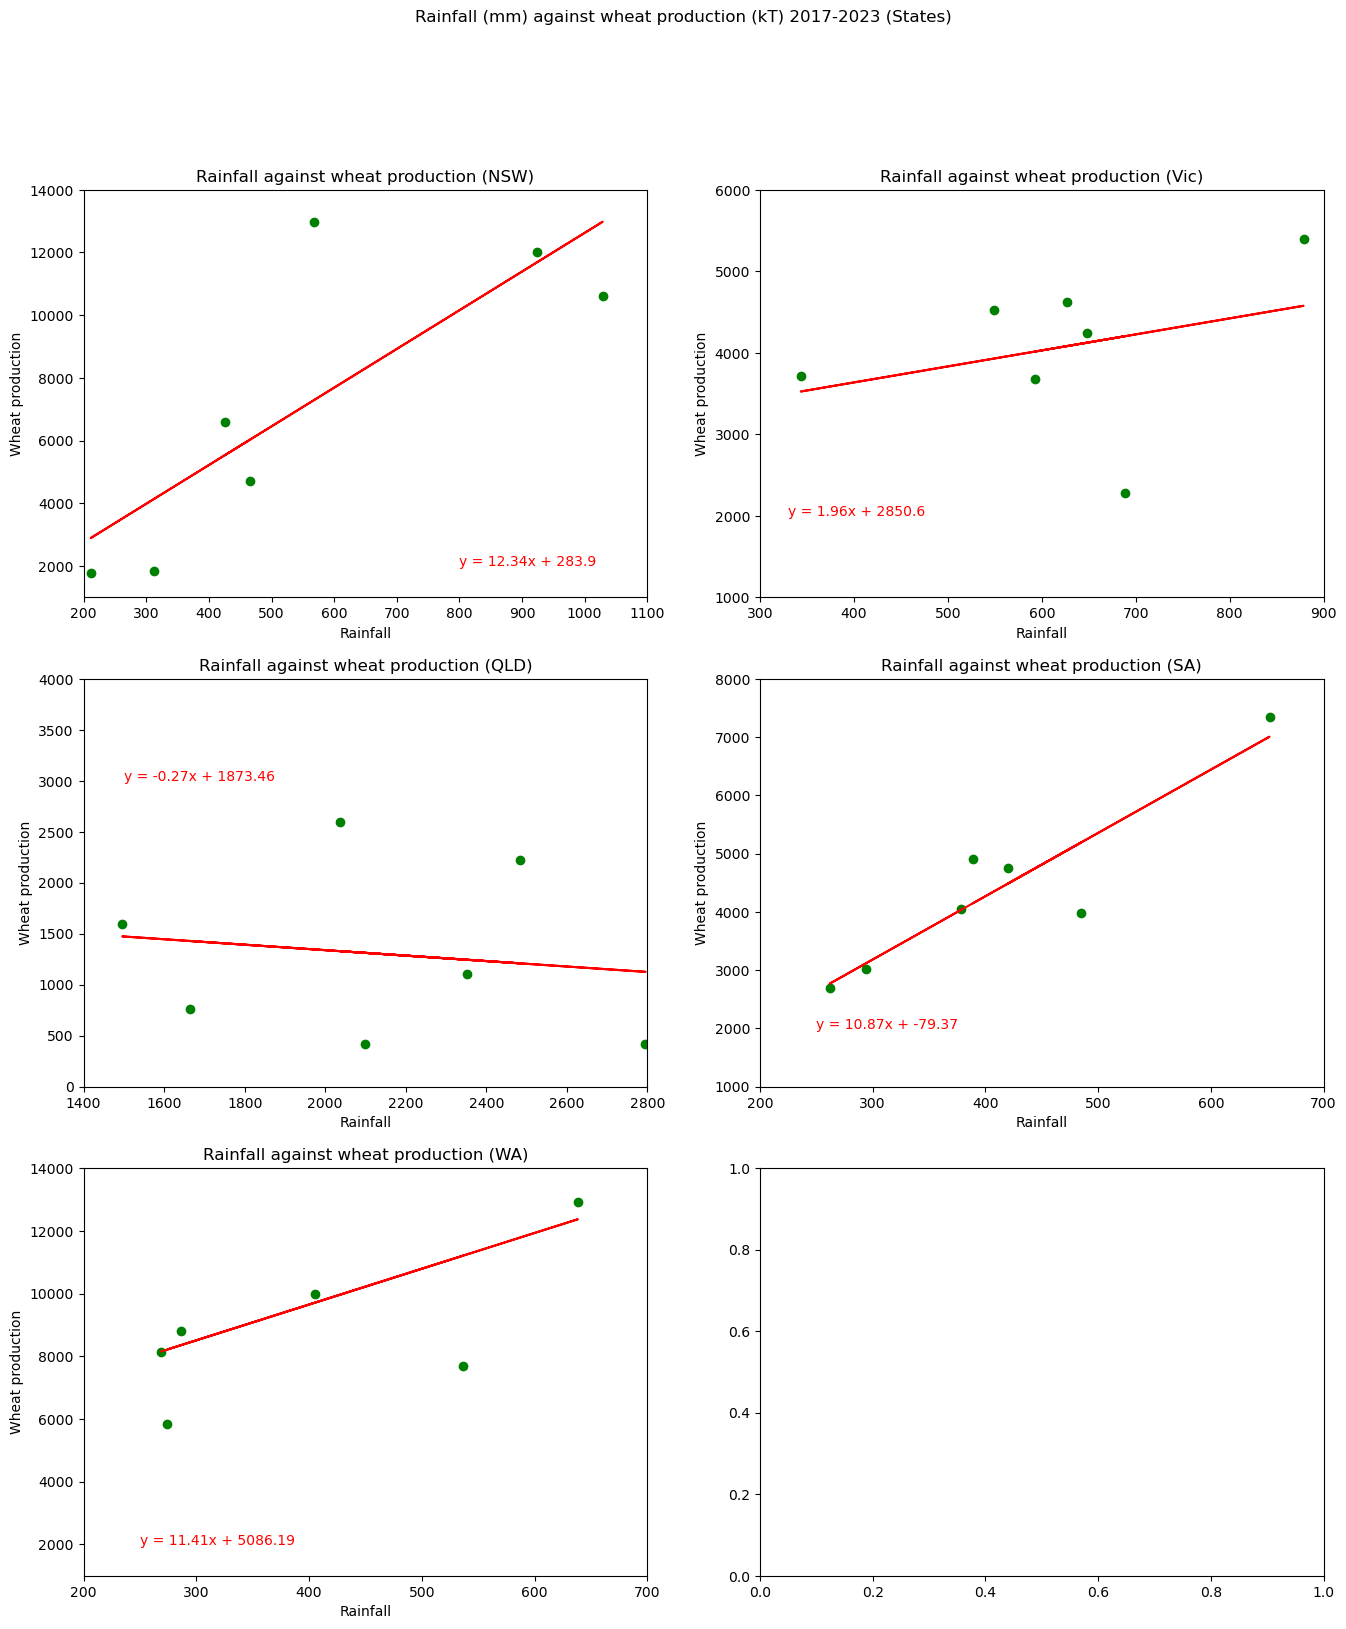

In [74]:
# Creating a multi plot with three rows and two columns
fig, axs = plt.subplots(3, 2)
fig.suptitle('Rainfall (mm) against wheat production (kT) 2017-2023 (States)')
fig.set_figheight(18)
fig.set_figwidth(16)

# NSW graph
# Creating a scatter graph with the year as the x value and yield as the y value
axs[0,0].scatter(rain_df_2017['NSW Annual Rainfall'], state_df['NSW_kt'], c='green')
axs[0,0].set_title('Rainfall against wheat production (NSW)')
axs[0,0].set_ylabel('Wheat production')
axs[0,0].set_xlabel('Rainfall')
axs[0,0].set_xlim(200, 1100)
axs[0,0].set_ylim(1000, 14000)

# NSW linear regression
nsw_x_values = rain_df_2017['NSW Annual Rainfall']
nsw_y_values = state_df['NSW_kt']
(nsw_slope, nsw_intercept, nsw_rvalue, nsw_pvalue, nsw_stderr) = st.linregress(nsw_x_values, nsw_y_values)
nsw_regress = nsw_x_values * nsw_slope + nsw_intercept
axs[0,0].annotate(f"y = {round(nsw_slope,2)}x + {round(nsw_intercept,2)}", xy=(800,2000), xycoords='data', color='red')
axs[0,0].plot(nsw_x_values,nsw_regress,"r-")

#------

# VIC graph
axs[0,1].scatter(rain_df_2017['VIC Annual Rainfall'], state_df['VIC_kt'], c='green')
axs[0,1].set_title('Rainfall against wheat production (Vic)')
axs[0,1].set_ylabel('Wheat production')
axs[0,1].set_xlabel('Rainfall')
axs[0,1].set_xlim(300, 900)
axs[0,1].set_ylim(1000, 6000)

# VIC linear regression
vic_x_values = rain_df_2017['VIC Annual Rainfall']
vic_y_values = state_df['VIC_kt']
(vic_slope, vic_intercept, vic_rvalue, vic_pvalue, vic_stderr) = st.linregress(vic_x_values, vic_y_values)
vic_regress = vic_x_values * vic_slope + vic_intercept
axs[0,1].annotate(f"y = {round(vic_slope,2)}x + {round(vic_intercept,2)}", xy=(330,2000), xycoords='data', color='red')
axs[0,1].plot(vic_x_values,vic_regress,"r-")


#------
# QLD graph
axs[1,0].scatter(rain_df_2017['QL Annual Rainfall'], state_df['QLD_kt'], c='green')
axs[1,0].set_title('Rainfall against wheat production (QLD)')
axs[1,0].set_ylabel('Wheat production')
axs[1,0].set_xlabel('Rainfall')
axs[1,0].set_xlim(1400, 2800)
axs[1,0].set_ylim(0, 4000)

# QLD linear regression (uncomment the section below once fixed)
qld_x_values = rain_df_2017['QL Annual Rainfall']
qld_y_values = state_df['QLD_kt']
(qld_slope, qld_intercept, qld_rvalue, qld_pvalue, qld_stderr) = st.linregress(qld_x_values, qld_y_values)
qld_regress = qld_x_values * qld_slope + qld_intercept
axs[1,0].annotate(f"y = {round(qld_slope,2)}x + {round(qld_intercept,2)}", xy=(1500,3000), xycoords='data', color='red')
axs[1,0].plot(qld_x_values,qld_regress,"r-")


#------
# SA graph
axs[1,1].scatter(rain_df_2017['SA Annual Rainfall'], state_df['SA_kt'], c='green')
axs[1,1].set_title('Rainfall against wheat production (SA)')
axs[1,1].set_ylabel('Wheat production')
axs[1,1].set_xlabel('Rainfall')
axs[1,1].set_xlim(200, 700)
axs[1,1].set_ylim(1000, 8000)

# SA linear regression (uncomment the section below once fixed)
sa_x_values = rain_df_2017['SA Annual Rainfall']
sa_y_values = state_df['SA_kt']
(sa_slope, sa_intercept, sa_rvalue, sa_pvalue, sa_stderr) = st.linregress(sa_x_values, sa_y_values)
sa_regress = sa_x_values * sa_slope + sa_intercept
axs[1,1].annotate(f"y = {round(sa_slope,2)}x + {round(sa_intercept,2)}", xy=(250,2000), xycoords='data', color='red')
axs[1,1].plot(sa_x_values,sa_regress,"r-")

#------

# WA graph
axs[2,0].scatter(rain_df_2017['WA Annual Rainfall'], state_df['WA_kt'], c='green')
axs[2,0].set_title('Rainfall against wheat production (WA)')
axs[2,0].set_ylabel('Wheat production')
axs[2,0].set_xlabel('Rainfall')
axs[2,0].set_xlim(200, 700)
axs[2,0].set_ylim(1000, 14000)

# WA regression
wa_x_values = rain_df_2017['WA Annual Rainfall']
wa_y_values = state_df['WA_kt']
(wa_slope, wa_intercept, wa_rvalue, wa_pvalue, wa_stderr) = st.linregress(wa_x_values, wa_y_values)
wa_regress = wa_x_values * wa_slope + wa_intercept
axs[2,0].annotate(f"y = {round(wa_slope,2)}x + {round(wa_intercept,2)}", xy=(250,2000), xycoords='data', color='red')
axs[2,0].plot(wa_x_values,wa_regress,"r-")

## Line plot series for both what planting area and wheat yield 2017-2023 (2.1)

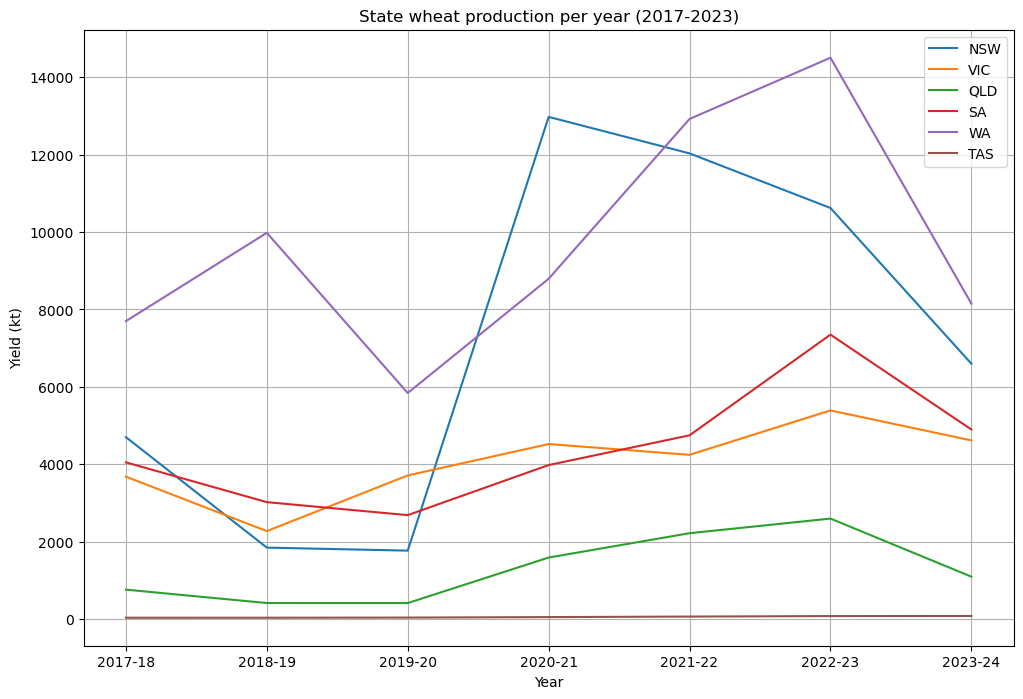

In [28]:
plt.figure(figsize=(12, 8))

# NSW graph
plt.plot(state_df['Year'], state_df['NSW_kt'], label='NSW')

# VIC graph
plt.plot(state_df['Year'], state_df['VIC_kt'], label='VIC')

# QLD graph
plt.plot(state_df['Year'], state_df['QLD_kt'], label='QLD')

# SA graph
plt.plot(state_df['Year'], state_df['SA_kt'], label='SA')

# WA graph
plt.plot(state_df['Year'], state_df['WA_kt'], label='WA')

# TAS graph
plt.plot(state_df['Year'], state_df['TAS_kt'], label='TAS')

plt.title('State wheat production per year (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Yield (kt)')
plt.legend()
plt.grid(True)

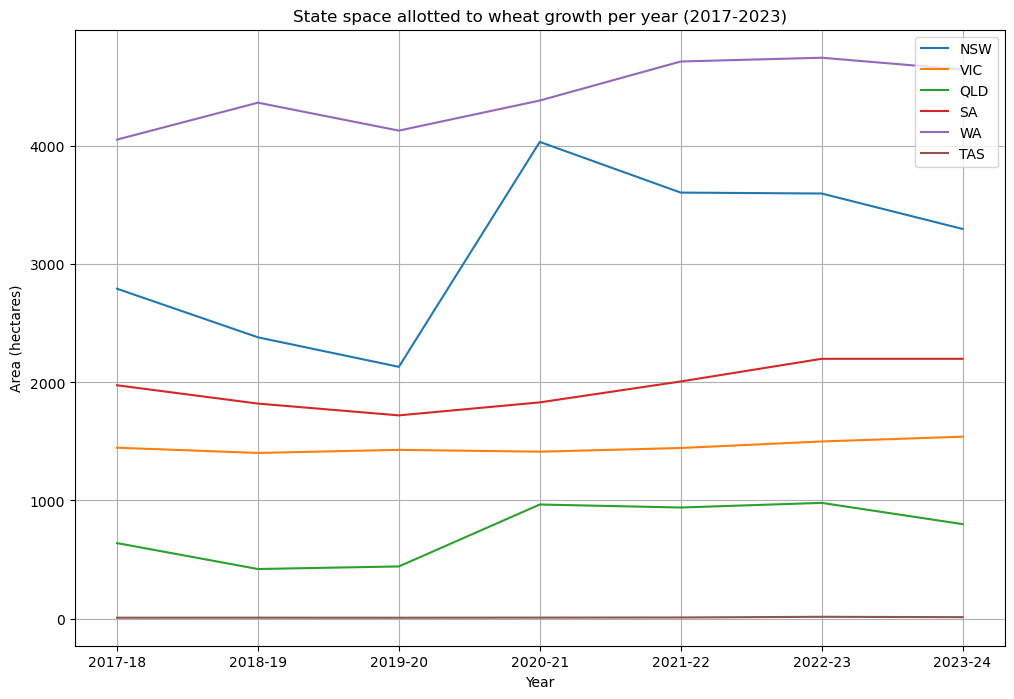

In [27]:
# Creating line graph for hectare use of wheat
plt.figure(figsize=(12, 8))

# NSW graph
plt.plot(state_df['Year'], state_df['NSW_ha'], label='NSW')

# VIC graph
plt.plot(state_df['Year'], state_df['VIC_ha'], label='VIC')

# QLD graph
plt.plot(state_df['Year'], state_df['QLD_ha'], label='QLD')

# SA graph
plt.plot(state_df['Year'], state_df['SA_ha'], label='SA')

# WA graph
plt.plot(state_df['Year'], state_df['WA_ha'], label='WA')

# TAS graph
plt.plot(state_df['Year'], state_df['TAS_ha'], label='TAS')

plt.title('State space allotted to wheat growth per year (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Area (hectares)')
plt.legend()
plt.grid(True)

## Scatter series on Wheat Planting Area against Wheat Yield (2.2)

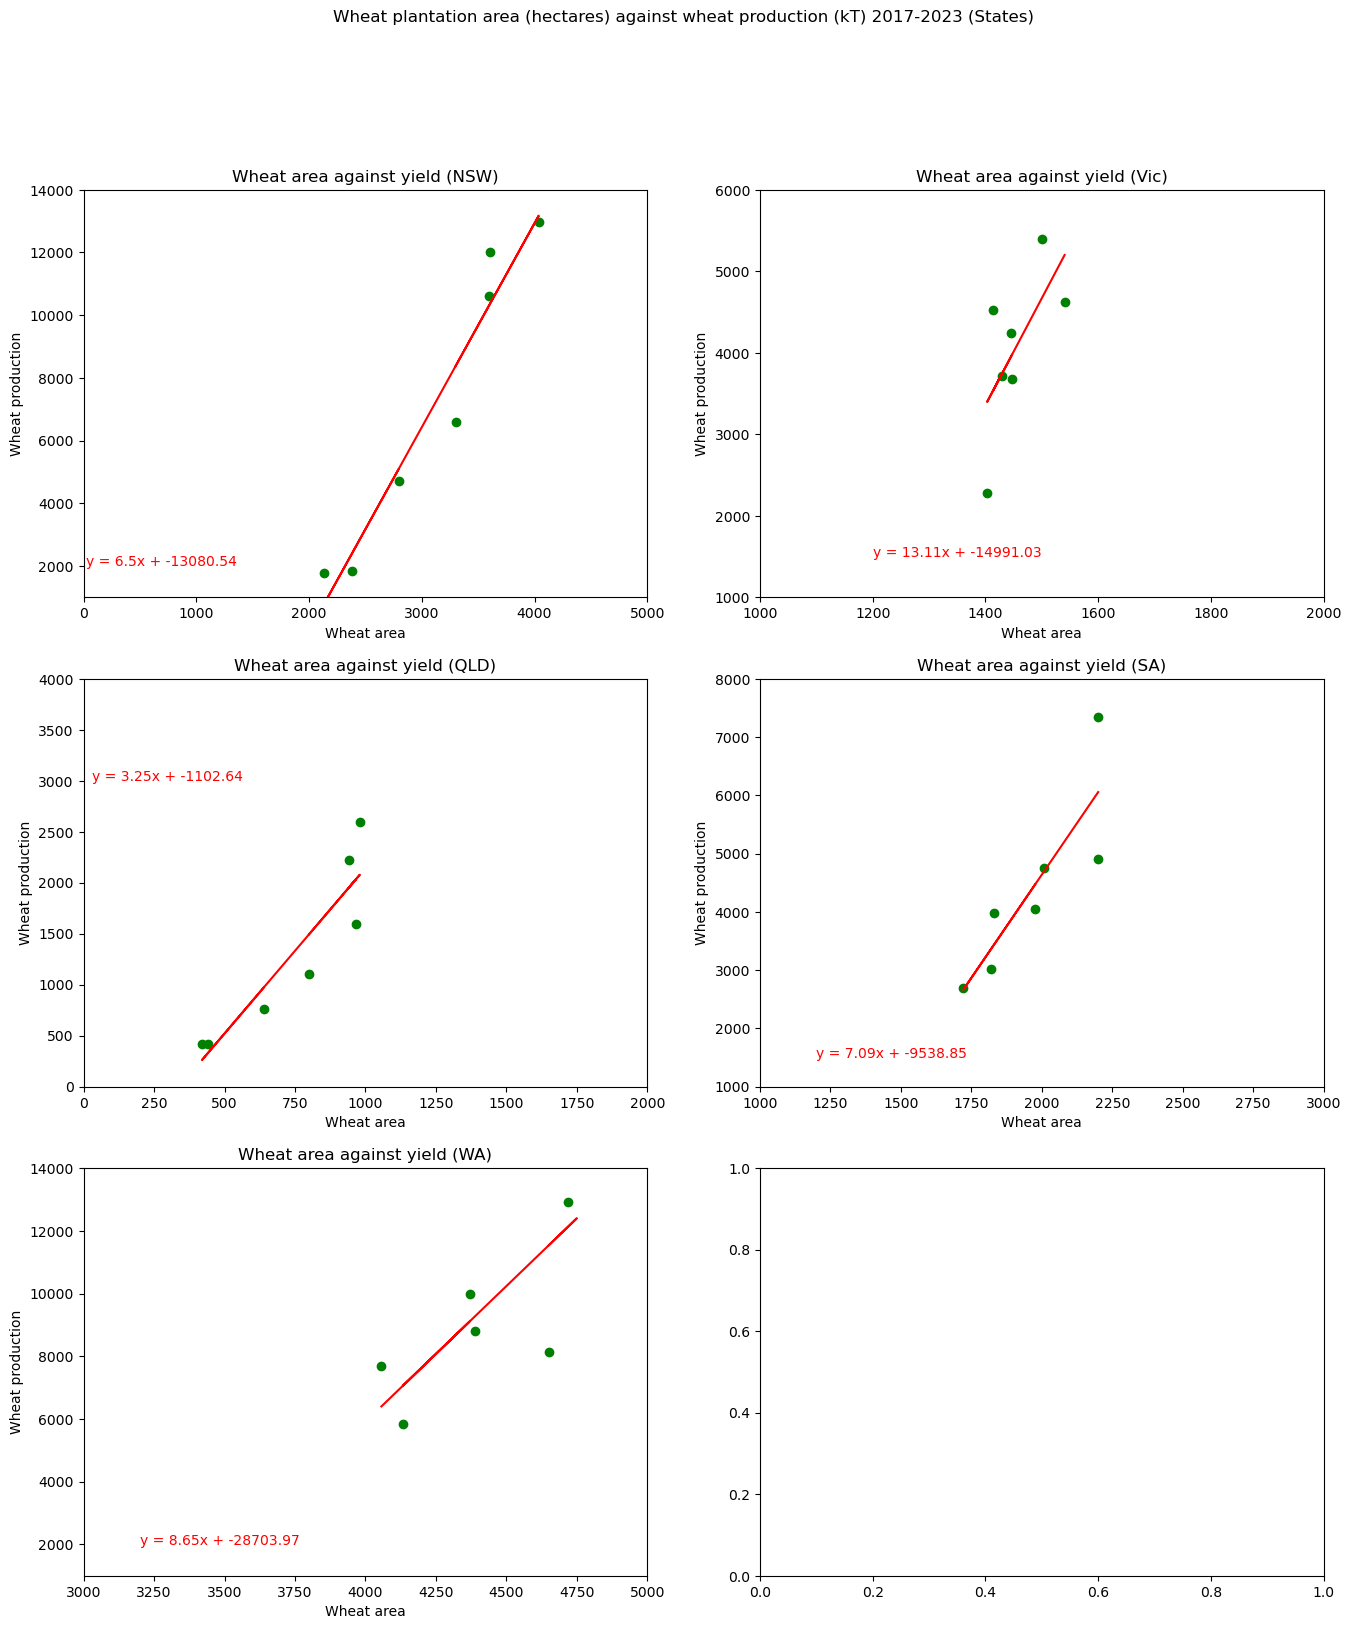

In [39]:
# Creating a multi plot with three rows and two columns
fig, axs = plt.subplots(3, 2)
fig.suptitle('Wheat plantation area (hectares) against wheat production (kT) 2017-2023 (States)')
fig.set_figheight(18)
fig.set_figwidth(16)

# NSW graph
# Creating a scatter graph with the year as the x value and yield as the y value
axs[0,0].scatter(state_df["NSW_ha"], state_df['NSW_kt'], c='green')
axs[0,0].set_title('Wheat area against yield (NSW)')
axs[0,0].set_ylabel('Wheat production')
axs[0,0].set_xlabel('Wheat area')
axs[0,0].set_xlim(0, 5000)
axs[0,0].set_ylim(1000, 14000)

# NSW linear regression
nsw_x_values = state_df['NSW_ha']
nsw_y_values = state_df['NSW_kt']
(nsw_slope, nsw_intercept, nsw_rvalue, nsw_pvalue, nsw_stderr) = st.linregress(nsw_x_values, nsw_y_values)
nsw_regress = nsw_x_values * nsw_slope + nsw_intercept
axs[0,0].annotate(f"y = {round(nsw_slope,2)}x + {round(nsw_intercept,2)}", xy=(23,2000), xycoords='data', color='red')
axs[0,0].plot(nsw_x_values,nsw_regress,"r-")

#------

# VIC graph
axs[0,1].scatter(state_df["VIC_ha"], state_df['VIC_kt'], c='green')
axs[0,1].set_title('Wheat area against yield (Vic)')
axs[0,1].set_ylabel('Wheat production')
axs[0,1].set_xlabel('Wheat area')
axs[0,1].set_xlim(1000, 2000)
axs[0,1].set_ylim(1000, 6000)

# VIC linear regression
vic_x_values = state_df["VIC_ha"]
vic_y_values = state_df['VIC_kt']
(vic_slope, vic_intercept, vic_rvalue, vic_pvalue, vic_stderr) = st.linregress(vic_x_values, vic_y_values)
vic_regress = vic_x_values * vic_slope + vic_intercept
axs[0,1].annotate(f"y = {round(vic_slope,2)}x + {round(vic_intercept,2)}", xy=(1200,1500), xycoords='data', color='red')
axs[0,1].plot(vic_x_values,vic_regress,"r-")


#------
# QLD graph
axs[1,0].scatter(state_df["QLD_ha"], state_df['QLD_kt'], c='green')
axs[1,0].set_title('Wheat area against yield (QLD)')
axs[1,0].set_ylabel('Wheat production')
axs[1,0].set_xlabel('Wheat area')
axs[1,0].set_xlim(0, 2000)
axs[1,0].set_ylim(0, 4000)

# QLD linear regression (uncomment the section below once fixed)
qld_x_values = state_df["QLD_ha"]
qld_y_values = state_df['QLD_kt']
(qld_slope, qld_intercept, qld_rvalue, qld_pvalue, qld_stderr) = st.linregress(qld_x_values, qld_y_values)
qld_regress = qld_x_values * qld_slope + qld_intercept
axs[1,0].annotate(f"y = {round(qld_slope,2)}x + {round(qld_intercept,2)}", xy=(29.5,3000), xycoords='data', color='red')
axs[1,0].plot(qld_x_values,qld_regress,"r-")


#------
# SA graph
axs[1,1].scatter(state_df["SA_ha"], state_df['SA_kt'], c='green')
axs[1,1].set_title('Wheat area against yield (SA)')
axs[1,1].set_ylabel('Wheat production')
axs[1,1].set_xlabel('Wheat area')
axs[1,1].set_xlim(1000, 3000)
axs[1,1].set_ylim(1000, 8000)

# SA linear regression (uncomment the section below once fixed)
sa_x_values = state_df["SA_ha"]
sa_y_values = state_df['SA_kt']
(sa_slope, sa_intercept, sa_rvalue, sa_pvalue, sa_stderr) = st.linregress(sa_x_values, sa_y_values)
sa_regress = sa_x_values * sa_slope + sa_intercept
axs[1,1].annotate(f"y = {round(sa_slope,2)}x + {round(sa_intercept,2)}", xy=(1200,1500), xycoords='data', color='red')
axs[1,1].plot(sa_x_values,sa_regress,"r-")

#------

# WA graph
axs[2,0].scatter(state_df["WA_ha"], state_df['WA_kt'], c='green')
axs[2,0].set_title('Wheat area against yield (WA)')
axs[2,0].set_ylabel('Wheat production')
axs[2,0].set_xlabel('Wheat area')
axs[2,0].set_xlim(3000, 5000)
axs[2,0].set_ylim(1000, 14000)

# WA regression
wa_x_values = state_df["WA_ha"]
wa_y_values = state_df['WA_kt']
(wa_slope, wa_intercept, wa_rvalue, wa_pvalue, wa_stderr) = st.linregress(wa_x_values, wa_y_values)
wa_regress = wa_x_values * wa_slope + wa_intercept
axs[2,0].annotate(f"y = {round(wa_slope,2)}x + {round(wa_intercept,2)}", xy=(3200,2000), xycoords='data', color='red')
axs[2,0].plot(wa_x_values,wa_regress,"r-")

## Years vs Climate change

The following code produces a line graph showing the year vs climate change

In [10]:
climate_df = pd.read_csv('Resources/Temperature_change_oceania_1960.csv', encoding = "ISO-8859-1")
australian_climate = climate_df.loc[climate_df['Area'] == 'Australia'].reset_index()
australian_climate = climate_df.drop(columns=['Area Code', 'Area Code (M49)', 'Area', "Months Code", 'Element Code'])
australian_climate.head()


,Months,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,January,Temperature change,°c,0.624,-0.170,-0.004,0.283,-0.856,0.117,-0.131,...,0.611,0.636,1.076,1.946,1.796,0.846,1.596,1.296,1.196,1.296
1,January,Standard Deviation,°c,0.447,0.447,0.447,0.447,0.447,0.447,0.447,...,0.447,0.447,0.447,0.447,0.447,0.447,0.447,0.447,0.447,0.447
2,February,Temperature change,°c,0.316,-0.050,0.189,0.351,-0.887,0.530,-0.500,...,1.251,1.548,1.608,2.688,0.888,1.038,1.588,0.738,0.838,1.038
3,February,Standard Deviation,°c,0.505,0.505,0.505,0.505,0.505,0.505,0.505,...,0.505,0.505,0.505,0.505,0.505,0.505,0.505,0.505,0.505,0.505
4,March,Temperature change,°c,-0.762,-0.055,-0.008,0.563,-0.673,0.626,0.146,...,1.109,1.269,1.519,1.749,1.899,1.349,1.299,1.699,1.049,1.999


In [11]:
climate_change = pd.read_csv('Resources/Temperature_change_oceania_1960.csv', encoding = "ISO-8859-1")

climate_change = climate_change.loc[(climate_change["Area"] == 'Australia') &
                                    (climate_change["Element"] != "Standard Deviation") &
                                    (climate_change["Months"] == 'Meteorological year')]


In [40]:
climate_change_2017 = climate_change.rename(columns= {"Y2016":"2017-18",
                                                 "Y2017":"2018-19",
                                                 "Y2018":"2019-20",
                                                 "Y2019":"2020-21",
                                                 "Y2020":"2021-22",
                                                 "Y2021":"2022-23",
                                                 "Y2022":"2023-24"})

climate_change_1990 = climate_change.rename(columns= {"Y1990":"1990", "Y1991":"1991", "Y1992":"1992","Y1993":"1993","Y1994":"1994", "Y1995":"1995","Y1996":"1996","Y1997":"1997",
                                                       "Y1998":"1998","Y1999":"1999","Y2000":"2000", "Y2001":"2001", "Y2002":"2002","Y2003":"2003","Y2004":"2004","Y2005":"2005",
                                                       "Y2006":"2006","Y2007":"2007", "Y2008":"2008","Y2009":"2009","Y2010":"2010","Y2011":"2011","Y2012":"2012","Y2013":"2013",
                                                       "Y2014":"2014","Y2015":"2015", "Y2016":"2016","Y2017":"2017","Y2018":"2018","Y2019":"2019","Y2020":"2020","Y2021":"2021", "Y2022":"2022",})


In [41]:
climate_change_new_2017 = climate_change_2017[["2017-18","2018-19","2019-20","2020-21", "2021-22","2022-23", "2023-24"]]
climate_change_new_2017 = climate_change_new_2017.T
climate_change_new_2017 = climate_change_new_2017.rename(columns= {66:"Climate Change Value"})


climate_change_new_1990 = climate_change_1990[["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000", 
                                               "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010",
                                               "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020","2021","2022"]]
climate_change_new_1990 = climate_change_new_1990.T
climate_change_new_1990 = climate_change_new_1990.rename(columns= {66:"Climate Change Value"})

climate_change_new_1990.head()

,Climate Change Value
1990,0.549
1991,0.820
1992,0.281
1993,0.484
1994,0.221


In [42]:
climate_change_new_2017["Year"] = climate_change_new_2017.index
climate_change_new_2017 = climate_change_new_2017.reset_index(drop=True)
climate_change_new_2017.head()

climate_change_new_1990["Year"] = climate_change_new_1990.index
climate_change_new_1990 = climate_change_new_1990.reset_index(drop=True)
climate_change_new_1990.head()

,Climate Change Value,Year
0,0.549,1990
1,0.820,1991
2,0.281,1992
3,0.484,1993
4,0.221,1994


## Wheat yield against climate change (2.3)

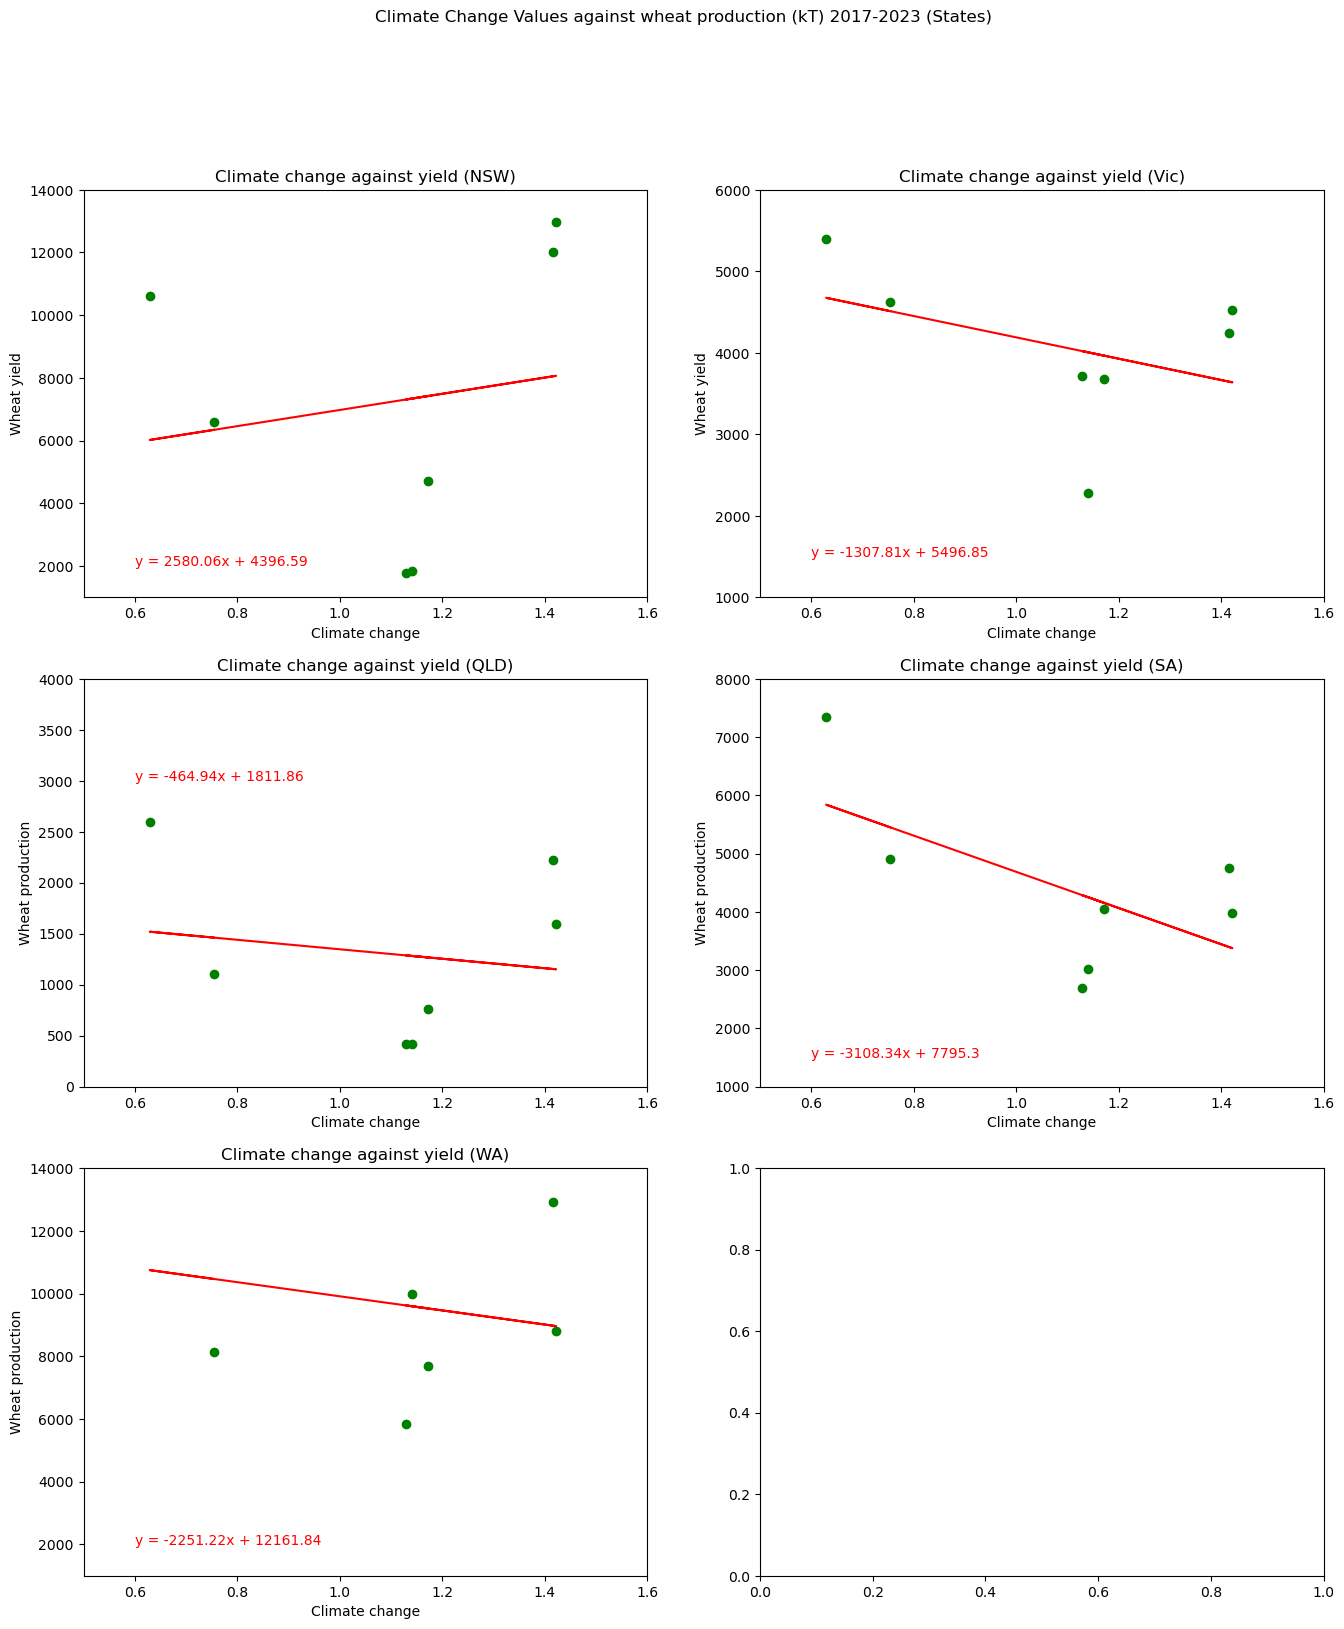

In [48]:
# Creating a multi plot with three rows and two columns
fig, axs = plt.subplots(3, 2)
fig.suptitle('Climate Change Values against wheat production (kT) 2017-2023 (States)')
fig.set_figheight(18)
fig.set_figwidth(16)

# NSW graph
# Creating a scatter graph with the year as the x value and yield as the y value
axs[0,0].scatter(climate_change_new_2017['Climate Change Value'], state_df['NSW_kt'], c='green')
axs[0,0].set_title('Climate change against yield (NSW)')
axs[0,0].set_ylabel('Wheat yield')
axs[0,0].set_xlabel('Climate change')
axs[0,0].set_xlim(0.5, 1.6)
axs[0,0].set_ylim(1000, 14000)

# NSW linear regression
nsw_x_values = climate_change_new_2017['Climate Change Value']
nsw_y_values = state_df['NSW_kt']
(nsw_slope, nsw_intercept, nsw_rvalue, nsw_pvalue, nsw_stderr) = st.linregress(nsw_x_values, nsw_y_values)
nsw_regress = nsw_x_values * nsw_slope + nsw_intercept
axs[0,0].annotate(f"y = {round(nsw_slope,2)}x + {round(nsw_intercept,2)}", xy=(0.6,2000), xycoords='data', color='red')
axs[0,0].plot(nsw_x_values,nsw_regress,"r-")

#------

# VIC graph
axs[0,1].scatter(climate_change_new_2017['Climate Change Value'], state_df['VIC_kt'], c='green')
axs[0,1].set_title('Climate change against yield (Vic)')
axs[0,1].set_ylabel('Wheat yield')
axs[0,1].set_xlabel('Climate change')
axs[0,1].set_xlim(0.5, 1.6)
axs[0,1].set_ylim(1000, 6000)

# VIC linear regression
vic_x_values = climate_change_new_2017['Climate Change Value']
vic_y_values = state_df['VIC_kt']
(vic_slope, vic_intercept, vic_rvalue, vic_pvalue, vic_stderr) = st.linregress(vic_x_values, vic_y_values)
vic_regress = vic_x_values * vic_slope + vic_intercept
axs[0,1].annotate(f"y = {round(vic_slope,2)}x + {round(vic_intercept,2)}", xy=(0.6,1500), xycoords='data', color='red')
axs[0,1].plot(vic_x_values,vic_regress,"r-")


#------
# QLD graph
axs[1,0].scatter(climate_change_new_2017['Climate Change Value'], state_df['QLD_kt'], c='green')
axs[1,0].set_title('Climate change against yield (QLD)')
axs[1,0].set_ylabel('Wheat production')
axs[1,0].set_xlabel('Climate change')
axs[1,0].set_xlim(0.5, 1.6)
axs[1,0].set_ylim(0, 4000)

# QLD linear regression (uncomment the section below once fixed)
qld_x_values = climate_change_new_2017['Climate Change Value']
qld_y_values = state_df['QLD_kt']
(qld_slope, qld_intercept, qld_rvalue, qld_pvalue, qld_stderr) = st.linregress(qld_x_values, qld_y_values)
qld_regress = qld_x_values * qld_slope + qld_intercept
axs[1,0].annotate(f"y = {round(qld_slope,2)}x + {round(qld_intercept,2)}", xy=(0.6,3000), xycoords='data', color='red')
axs[1,0].plot(qld_x_values,qld_regress,"r-")


#------
# SA graph
axs[1,1].scatter(climate_change_new_2017['Climate Change Value'], state_df['SA_kt'], c='green')
axs[1,1].set_title('Climate change against yield (SA)')
axs[1,1].set_ylabel('Wheat production')
axs[1,1].set_xlabel('Climate change')
axs[1,1].set_xlim(0.5, 1.6)
axs[1,1].set_ylim(1000, 8000)

# SA linear regression (uncomment the section below once fixed)
sa_x_values = climate_change_new_2017['Climate Change Value']
sa_y_values = state_df['SA_kt']
(sa_slope, sa_intercept, sa_rvalue, sa_pvalue, sa_stderr) = st.linregress(sa_x_values, sa_y_values)
sa_regress = sa_x_values * sa_slope + sa_intercept
axs[1,1].annotate(f"y = {round(sa_slope,2)}x + {round(sa_intercept,2)}", xy=(0.6,1500), xycoords='data', color='red')
axs[1,1].plot(sa_x_values,sa_regress,"r-")

#------

# WA graph
axs[2,0].scatter(climate_change_new_2017['Climate Change Value'], state_df['WA_kt'], c='green')
axs[2,0].set_title('Climate change against yield (WA)')
axs[2,0].set_ylabel('Wheat production')
axs[2,0].set_xlabel('Climate change')
axs[2,0].set_xlim(0.5, 1.6)
axs[2,0].set_ylim(1000, 14000)

# WA regression
wa_x_values = climate_change_new_2017['Climate Change Value']
wa_y_values = state_df['WA_kt']
(wa_slope, wa_intercept, wa_rvalue, wa_pvalue, wa_stderr) = st.linregress(wa_x_values, wa_y_values)
wa_regress = wa_x_values * wa_slope + wa_intercept
axs[2,0].annotate(f"y = {round(wa_slope,2)}x + {round(wa_intercept,2)}", xy=(0.6,2000), xycoords='data', color='red')
axs[2,0].plot(wa_x_values,wa_regress,"r-")

## R-values and p-values for 2.3, 2.4 and 2.5

In [77]:
#R-values and p-values for 2.3
print("Values for wheat production against climate change values")
vic_WC = st.pearsonr(state_df['VIC_kt'], climate_change_new_2017['Climate Change Value'])
print(f"Vic's r value is {round(vic_WC[0],2)}")
print(f"Vic's p value is {round(vic_WC[1],2)}")

nsw_WC = st.pearsonr(state_df['NSW_kt'], climate_change_new_2017['Climate Change Value'])
print(f"NSW's r value is {round(nsw_WC[0],2)}")
print(f"NSW's p value is {round(nsw_WC[1],2)}")

qld_WC = st.pearsonr(state_df['QLD_kt'], climate_change_new_2017['Climate Change Value'])
print(f"QLD's r value is {round(qld_WC[0],2)}")
print(f"QLD's p value is {round(qld_WC[1],2)}")

sa_WC = st.pearsonr(state_df['SA_kt'], climate_change_new_2017['Climate Change Value'])
print(f"SA's r value is {round(sa_WC[0],2)}")
print(f"SA's p value is {round(sa_WC[1],2)}")

wa_WC = st.pearsonr(state_df['WA_kt'], climate_change_new_2017['Climate Change Value'])
print(f"WA's r value is {round(wa_WC[0],2)}")
print(f"WA's p value is {round(wa_WC[1],2)}")

print("----------------------")

#R-values and p-values for 2.4
print("Values for wheat production against temp")
vic_WC = st.pearsonr(state_df['VIC_kt'], temp_df_2017['VIC Annual Max Mean Temp'])
print(f"Vic's r value is {round(vic_WC[0],2)}")
print(f"Vic's p value is {round(vic_WC[1],2)}")

nsw_WC = st.pearsonr(state_df['NSW_kt'], temp_df_2017['NSW Annual Max Mean Temp'])
print(f"NSW's r value is {round(nsw_WC[0],2)}")
print(f"NSW's p value is {round(nsw_WC[1],2)}")

qld_WC = st.pearsonr(state_df['QLD_kt'], temp_df_2017['QL Annual Max Mean Temp'])
print(f"QLD's r value is {round(qld_WC[0],2)}")
print(f"QLD's p value is {round(qld_WC[1],2)}")

sa_WC = st.pearsonr(state_df['SA_kt'], temp_df_2017['SA Annual Max Mean Temp'])
print(f"SA's r value is {round(sa_WC[0],2)}")
print(f"SA's p value is {round(sa_WC[1],2)}")

wa_WC = st.pearsonr(state_df['WA_kt'], temp_df_2017['WA Annual Max Mean Temp'])
print(f"WA's r value is {round(wa_WC[0],2)}")
print(f"WA's p value is {round(wa_WC[1],4)}")
print("----------------------")

#R-values and p-values for 2.5
print("Values for wheat production against rainfall")
vic_WR = st.pearsonr(state_df['VIC_kt'], rain_df_2017['VIC Annual Rainfall'])
print(f"Vic's r value is {round(vic_WR[0],2)}")
print(f"Vic's p value is {round(vic_WR[1],2)}")

nsw_WR = st.pearsonr(state_df['NSW_kt'], rain_df_2017['NSW Annual Rainfall'])
print(f"NSW's r value is {round(nsw_WR[0],2)}")
print(f"NSW's p value is {round(nsw_WR[1],2)}")

qld_WR = st.pearsonr(state_df['QLD_kt'], rain_df_2017['QL Annual Rainfall'])
print(f"QLD's r value is {round(qld_WR[0],2)}")
print(f"QLD's p value is {round(qld_WR[1],2)}")

sa_WR = st.pearsonr(state_df['SA_kt'], rain_df_2017['SA Annual Rainfall'])
print(f"SA's r value is {round(sa_WR[0],2)}")
print(f"SA's p value is {round(sa_WR[1],4)}")

wa_WR = st.pearsonr(state_df['WA_kt'], rain_df_2017['WA Annual Rainfall'])
print(f"WA's r value is {round(wa_WR[0],2)}")
print(f"WA's p value is {round(wa_WR[1],2)}")

Values for wheat production against climate change values
Vic's r value is -0.4
Vic's p value is 0.37
NSW's r value is 0.17
NSW's p value is 0.72
QLD's r value is -0.16
QLD's p value is 0.73
SA's r value is -0.61
SA's p value is 0.14
WA's r value is -0.22
WA's p value is 0.63
----------------------
Values for wheat production against temp
Vic's r value is -0.85
Vic's p value is 0.02
NSW's r value is -0.88
NSW's p value is 0.01
QLD's r value is 0.77
QLD's p value is 0.04
SA's r value is -0.88
SA's p value is 0.01
WA's r value is -0.76
WA's p value is 0.0496
----------------------
Values for wheat production against rainfall
Vic's r value is 0.32
Vic's p value is 0.48
NSW's r value is 0.8
NSW's p value is 0.03
QLD's r value is -0.14
QLD's p value is 0.76
SA's r value is 0.92
SA's p value is 0.0035
WA's r value is 0.53
WA's p value is 0.22


### Temperature vs state

This code will show the temperature for each state per year with the temperature range for optimal plant growth highlighted

In [15]:
cairns_temp = pd.read_csv('Resources/Cairns_QL_BOM/Cairns_Annual_Mean_Max_Temp.csv')
coffin_bay_temp = pd.read_csv('Resources/CoffinBay_SA_BOM/Wanilla_Annual_Mean_Max_Temp.csv')
dubbo_temp = pd.read_csv('Resources/Dubbo_NSW_BOM/Dubbo_Anuual_Mean_Max_Temp.csv')
northam_temp = pd.read_csv('Resources/Northam_WA_BOM/Northam_Annual_Mean_Max_Temp.csv')
wangaratta_temp = pd.read_csv('Resources/Wangaratta_VIC_BOM/Wangaratta_Annual_Mean_Max_Temp.csv')

cairns_temp = cairns_temp[['Year', 'Annual']]
coffin_bay_temp = coffin_bay_temp[['Year', 'Annual']]
dubbo_temp = dubbo_temp[['Year', 'Annual']]
northam_temp = northam_temp[['Year', 'Annual']]
wangaratta_temp = wangaratta_temp[['Year', 'Annual']]

city_temp = cairns_temp
city_temp = city_temp.rename(columns={'Annual' : 'Cairns Average'})
city_temp = city_temp.merge(coffin_bay_temp.rename(columns={'Annual' : 'Coffin Bay Average'}), how='left', on='Year')
city_temp = city_temp.merge(dubbo_temp.rename(columns={"Annual" : 'Dubbo Average'}), how='left', on='Year')
city_temp = city_temp.merge(northam_temp.rename(columns={'Annual' : "Northam Average"}), how='left', on='Year')
city_temp = city_temp.merge(wangaratta_temp.rename(columns={'Annual' : "Wangaratta Average"}), how='left', on='Year')
city_temp.dtypes

Year                    int64
Cairns Average        float64
Coffin Bay Average    float64
Dubbo Average         float64
Northam Average       float64
Wangaratta Average    float64
dtype: object

Temperature against climate change

In [16]:
climate_change_new_1990['Year'] = climate_change_new_1990['Year'].astype(float)
climate_2000 = climate_change_new_1990.loc[climate_change_new_1990["Year"] > 1999]

In [17]:
climate_2000['Year'] = climate_2000['Year'].astype(int)

cc_weather = pd.merge(climate_2000, temp_df_2000, how='left', on='Year')
cc_weather.head()


C:\Users\bosb0\AppData\Local\Temp\ipykernel_1560\1190245567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_2000['Year'] = climate_2000['Year'].astype(int)


,Climate Change Value,Year,NSW Annual Max Mean Temp,QL Annual Max Mean Temp,VIC Annual Max Mean Temp,SA Annual Max Mean Temp,WA Annual Max Mean Temp
0,0.148,2000,23.1,28.7,21.9,21.0,25.3
1,0.336,2001,24.4,29.4,22.5,20.8,25.2
2,0.736,2002,25.5,29.8,23.1,21.2,26.0
3,0.835,2003,24.4,29.4,22.1,20.7,25.6
4,0.723,2004,25.0,29.1,22.1,21.3,25.5


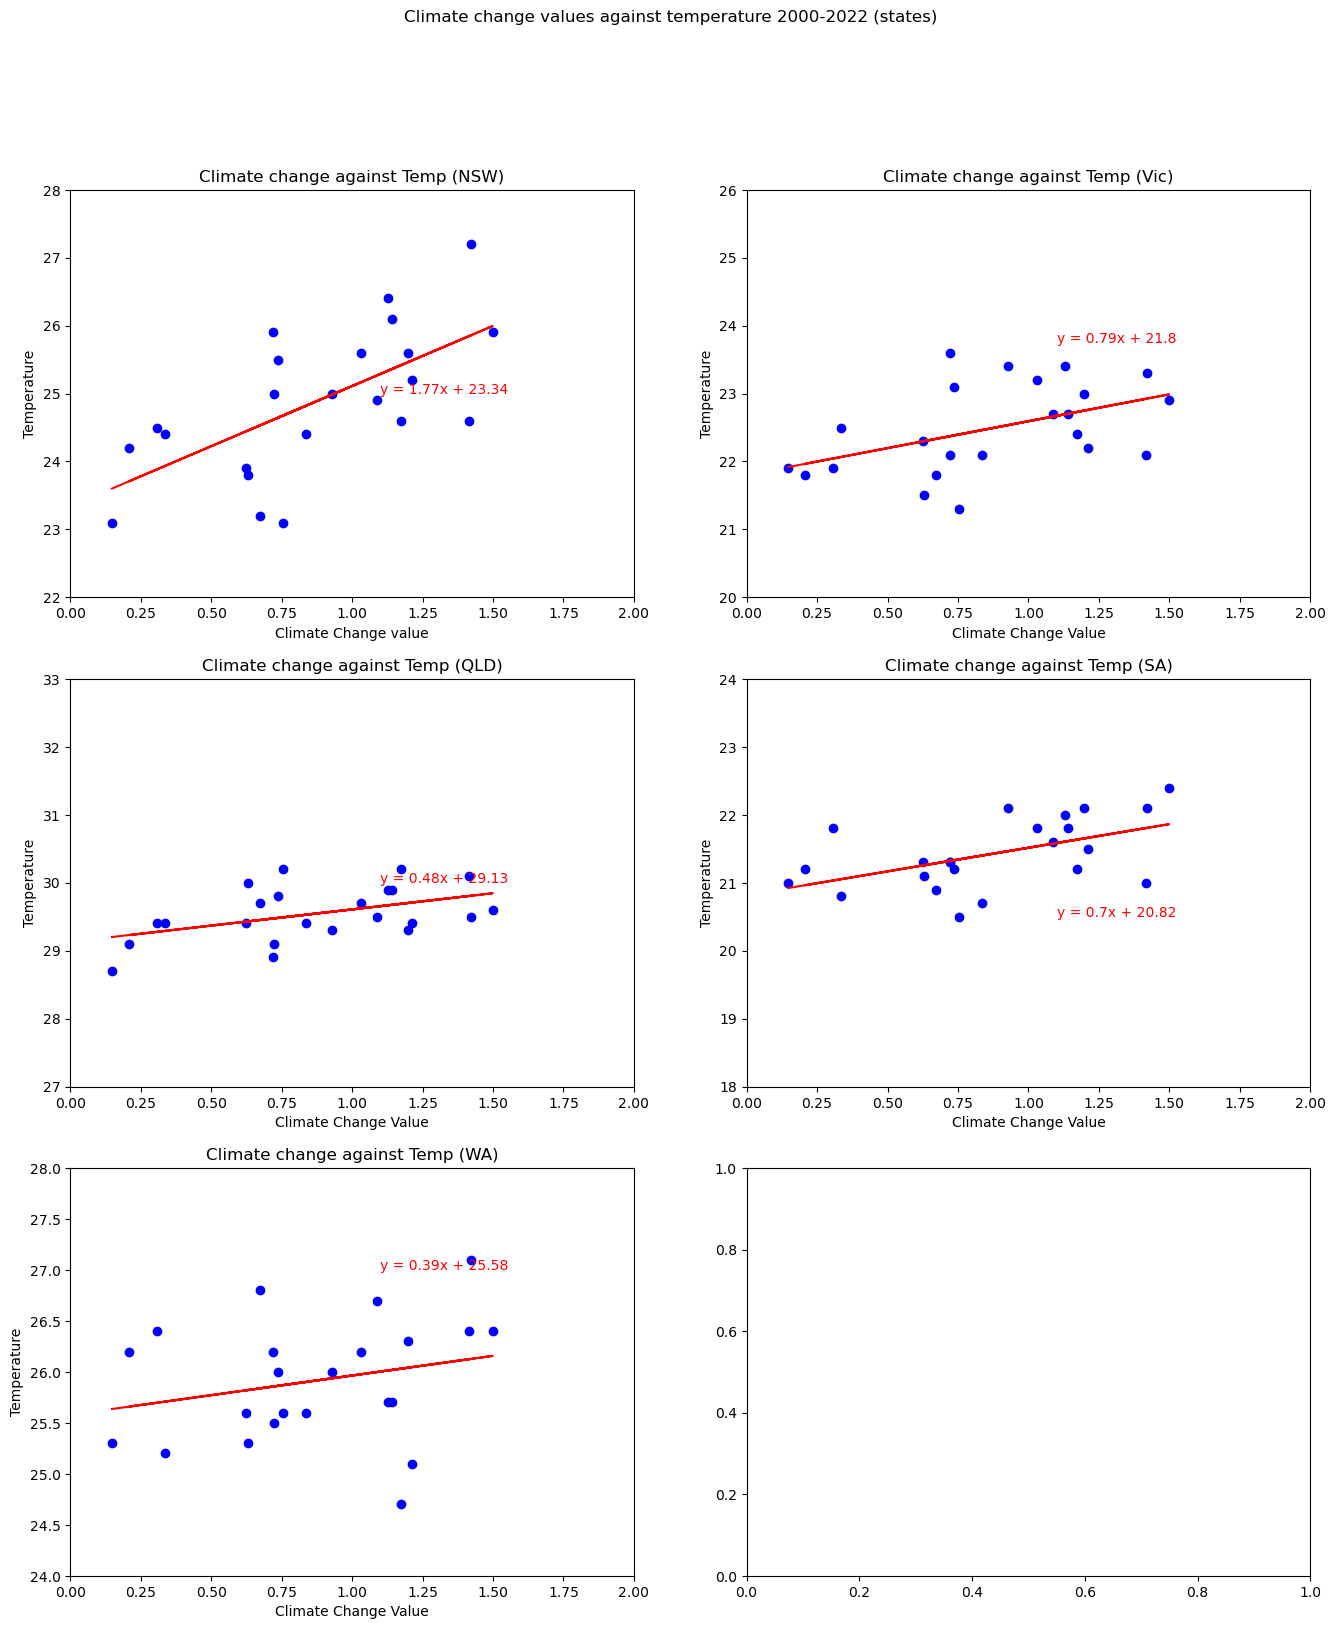

In [18]:

# Creating a multi plot with three rows and two columns
fig, axs = plt.subplots(3, 2)
fig.suptitle('Climate change values against temperature 2000-2022 (states)')
fig.set_figheight(18)
fig.set_figwidth(16)

# NSW graph
# Creating a scatter graph with the year as the x value and yield as the y value
axs[0,0].scatter(cc_weather['Climate Change Value'], cc_weather['NSW Annual Max Mean Temp'], c='blue')
axs[0,0].set_title('Climate change against Temp (NSW)')
axs[0,0].set_ylabel('Temperature')
axs[0,0].set_xlabel('Climate Change value')
axs[0,0].set_xlim(0, 2)
axs[0,0].set_ylim(22, 28)

# NSW linear regression
nsw_x_values = cc_weather['Climate Change Value']
nsw_y_values = cc_weather['NSW Annual Max Mean Temp']
(nsw_slope, nsw_intercept, nsw_rvalue, nsw_pvalue, nsw_stderr) = st.linregress(nsw_x_values, nsw_y_values)
nsw_regress = nsw_x_values * nsw_slope + nsw_intercept
axs[0,0].annotate(f"y = {round(nsw_slope,2)}x + {round(nsw_intercept,2)}", xy=(1.1,25), xycoords='data', color='red')
axs[0,0].plot(nsw_x_values,nsw_regress,"r-")

#------

# VIC graph
axs[0,1].scatter(cc_weather['Climate Change Value'], cc_weather['VIC Annual Max Mean Temp'], c='blue')
axs[0,1].set_title('Climate change against Temp (Vic)')
axs[0,1].set_ylabel('Temperature')
axs[0,1].set_xlabel('Climate Change Value')
axs[0,1].set_xlim(0, 2)
axs[0,1].set_ylim(20, 26)

# VIC linear regression
vic_x_values = cc_weather['Climate Change Value']
vic_y_values = cc_weather['VIC Annual Max Mean Temp']
(vic_slope, vic_intercept, vic_rvalue, vic_pvalue, vic_stderr) = st.linregress(vic_x_values, vic_y_values)
vic_regress = vic_x_values * vic_slope + vic_intercept
axs[0,1].annotate(f"y = {round(vic_slope,2)}x + {round(vic_intercept,2)}", xy=(1.1,23.75), xycoords='data', color='red')
axs[0,1].plot(vic_x_values,vic_regress,"r-")


#------
# QLD graph
axs[1,0].scatter(cc_weather['Climate Change Value'], cc_weather['QL Annual Max Mean Temp'], c='blue')
axs[1,0].set_title('Climate change against Temp (QLD)')
axs[1,0].set_ylabel('Temperature')
axs[1,0].set_xlabel('Climate Change Value')
axs[1,0].set_xlim(0, 2)
axs[1,0].set_ylim(27, 33)

# QLD linear regression (uncomment the section below once fixed)
qld_x_values = cc_weather['Climate Change Value']
qld_y_values = cc_weather['QL Annual Max Mean Temp']
(qld_slope, qld_intercept, qld_rvalue, qld_pvalue, qld_stderr) = st.linregress(qld_x_values, qld_y_values)
qld_regress = qld_x_values * qld_slope + qld_intercept
axs[1,0].annotate(f"y = {round(qld_slope,2)}x + {round(qld_intercept,2)}", xy=(1.1,30), xycoords='data', color='red')
axs[1,0].plot(qld_x_values,qld_regress,"r-")


#------
# SA graph
axs[1,1].scatter(cc_weather['Climate Change Value'], cc_weather['SA Annual Max Mean Temp'], c='blue')
axs[1,1].set_title('Climate change against Temp (SA)')
axs[1,1].set_ylabel('Temperature')
axs[1,1].set_xlabel('Climate Change Value')
axs[1,1].set_xlim(0, 2)
axs[1,1].set_ylim(18, 24)

# SA linear regression (uncomment the section below once fixed)
sa_x_values = cc_weather['Climate Change Value']
sa_y_values = cc_weather['SA Annual Max Mean Temp']
(sa_slope, sa_intercept, sa_rvalue, sa_pvalue, sa_stderr) = st.linregress(sa_x_values, sa_y_values)
sa_regress = sa_x_values * sa_slope + sa_intercept
axs[1,1].annotate(f"y = {round(sa_slope,2)}x + {round(sa_intercept,2)}", xy=(1.1,20.5), xycoords='data', color='red')
axs[1,1].plot(sa_x_values,sa_regress,"r-")

#------

# WA graph
axs[2,0].scatter(cc_weather['Climate Change Value'], cc_weather['WA Annual Max Mean Temp'], c='blue')
axs[2,0].set_title('Climate change against Temp (WA)')
axs[2,0].set_ylabel('Temperature')
axs[2,0].set_xlabel('Climate Change Value')
axs[2,0].set_xlim(0, 2)
axs[2,0].set_ylim(24, 28)

# linear regression (uncomment the section below once fixed)
wa_x_values = cc_weather['Climate Change Value']
wa_y_values = cc_weather['WA Annual Max Mean Temp']
(wa_slope, wa_intercept, wa_rvalue, wa_pvalue, wa_stderr) = st.linregress(wa_x_values, wa_y_values)
wa_regress = wa_x_values * wa_slope + wa_intercept
axs[2,0].annotate(f"y = {round(wa_slope,2)}x + {round(wa_intercept,2)}", xy=(1.1,27), xycoords='data', color='red')
axs[2,0].plot(wa_x_values,wa_regress,"r-")

In [19]:
r_vic_ccTemp = cc_weather['Climate Change Value'].corr(cc_weather['VIC Annual Max Mean Temp'])
print(f"Vic r value (climate/temp) = {r_vic_ccTemp}")

r_nsw_ccTemp = cc_weather['Climate Change Value'].corr(cc_weather['NSW Annual Max Mean Temp'])
print(f"NSW r value (climate/temp) = {r_nsw_ccTemp}")

r_qld_ccTemp = cc_weather['Climate Change Value'].corr(cc_weather['QL Annual Max Mean Temp'])
print(f"QLD r value (climate/temp) = {r_qld_ccTemp}")

r_wa_ccTemp = cc_weather['Climate Change Value'].corr(cc_weather['WA Annual Max Mean Temp'])
print(f"WA r value (climate/temp) = {r_wa_ccTemp}")

r_sa_ccTemp = cc_weather['Climate Change Value'].corr(cc_weather['SA Annual Max Mean Temp'])
print(f"SA r value (climate/temp) = {r_sa_ccTemp}")


Vic r value (climate/temp) = 0.4664921282637414
NSW r value (climate/temp) = 0.6417272448804844
QLD r value (climate/temp) = 0.4648691678493662
WA r value (climate/temp) = 0.2505275726470553
SA r value (climate/temp) = 0.5256875646420378


Climate Change against Rainfall

In [20]:
cc_rain = pd.merge(climate_2000, rain_df_2000, how='left', on='Year')
cc_rain

,Climate Change Value,Year,NSW Annual Rainfall,QL Annual Rainfall,VIC Annual Rainfall,SA Annual Rainfall,WA Annual Rainfall
0,0.148,2000,809.0,3148.8,565.3,447.0,393.30
1,0.336,2001,611.2,1667.8,577.6,469.9,306.20
2,0.736,2002,381.8,721.0,415.2,325.8,301.60
3,0.835,2003,543.8,1279.2,658.0,527.2,433.80
4,0.723,2004,469.4,2777.6,492.4,314.8,347.00
5,1.211,2005,532.0,1470.8,728.2,448.0,408.20
6,0.721,2006,228.6,2289.0,283.0,312.8,417.60
7,0.929,2007,566.0,1813.0,441.8,349.0,415.90
8,0.625,2008,610.6,2215.2,488.6,379.6,445.70
9,1.030,2009,539.4,2199.4,420.6,399.2,404.30


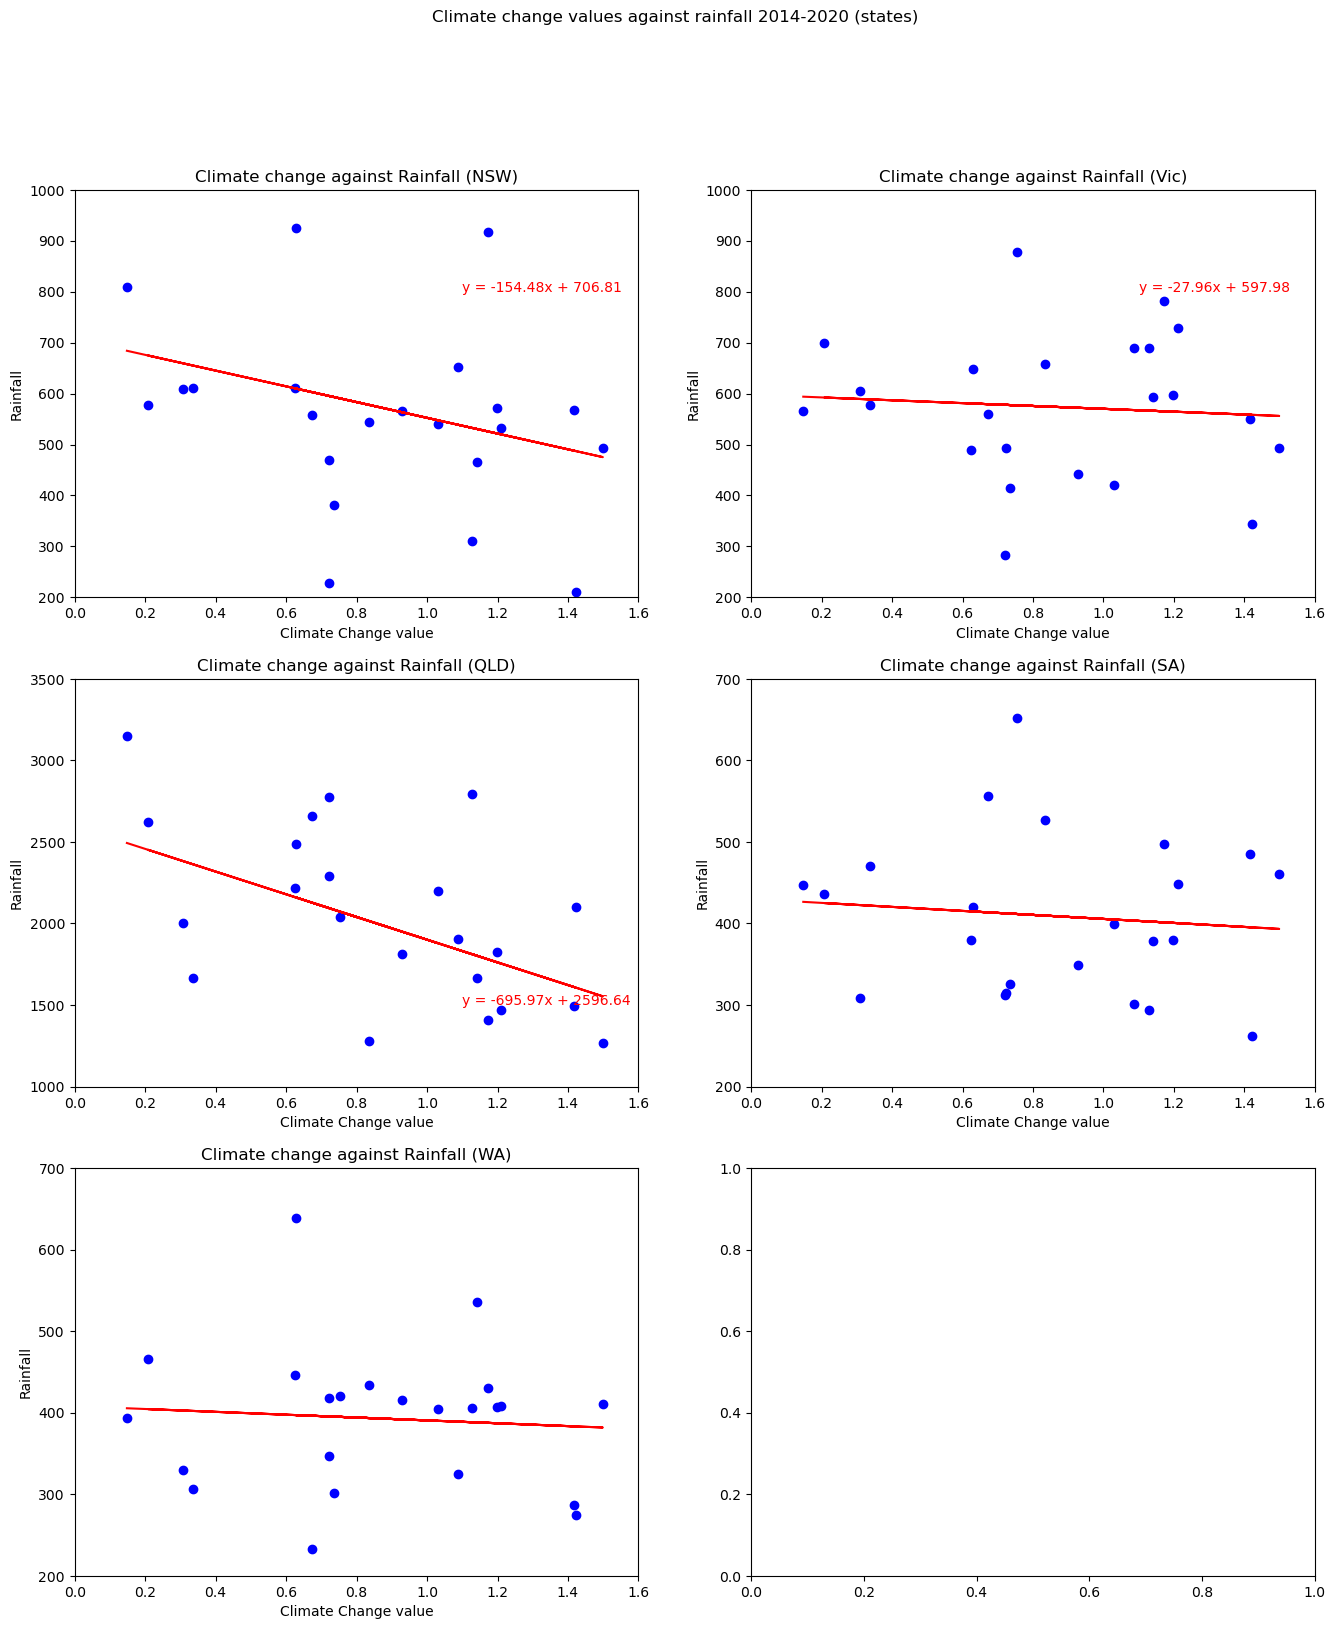

In [21]:
# Creating a multi plot with three rows and two columns
fig, axs = plt.subplots(3, 2)
fig.suptitle('Climate change values against rainfall 2014-2020 (states)')
fig.set_figheight(18)
fig.set_figwidth(16)

# NSW graph
# Creating a scatter graph with the year as the x value and yield as the y value
axs[0,0].scatter(cc_rain['Climate Change Value'], cc_rain['NSW Annual Rainfall'], c='blue')
axs[0,0].set_title('Climate change against Rainfall (NSW)')
axs[0,0].set_ylabel('Rainfall')
axs[0,0].set_xlabel('Climate Change value')
axs[0,0].set_xlim(0, 1.6)
axs[0,0].set_ylim(200, 1000)

# NSW linear regression
nsw_x_values = cc_rain['Climate Change Value']
nsw_y_values = cc_rain['NSW Annual Rainfall']
(nsw_slope, nsw_intercept, nsw_rvalue, nsw_pvalue, nsw_stderr) = st.linregress(nsw_x_values, nsw_y_values)
nsw_regress = nsw_x_values * nsw_slope + nsw_intercept
axs[0,0].annotate(f"y = {round(nsw_slope,2)}x + {round(nsw_intercept,2)}", xy=(1.1,800), xycoords='data', color='red')
axs[0,0].plot(nsw_x_values,nsw_regress,"r-")

#------

# VIC graph
axs[0,1].scatter(cc_rain['Climate Change Value'], cc_rain['VIC Annual Rainfall'], c='blue')
axs[0,1].set_title('Climate change against Rainfall (Vic)')
axs[0,1].set_ylabel('Rainfall')
axs[0,1].set_xlabel('Climate Change value')
axs[0,1].set_xlim(0, 1.6)
axs[0,1].set_ylim(200, 1000)

# VIC linear regression
vic_x_values = cc_rain['Climate Change Value']
vic_y_values = cc_rain['VIC Annual Rainfall']
(vic_slope, vic_intercept, vic_rvalue, vic_pvalue, vic_stderr) = st.linregress(vic_x_values, vic_y_values)
vic_regress = vic_x_values * vic_slope + vic_intercept
axs[0,1].annotate(f"y = {round(vic_slope,2)}x + {round(vic_intercept,2)}", xy=(1.1,800), xycoords='data', color='red')
axs[0,1].plot(vic_x_values,vic_regress,"r-")


#------
# QLD graph
axs[1,0].scatter(cc_rain['Climate Change Value'], cc_rain['QL Annual Rainfall'], c='blue')
axs[1,0].set_title('Climate change against Rainfall (QLD)')
axs[1,0].set_ylabel('Rainfall')
axs[1,0].set_xlabel('Climate Change value')
axs[1,0].set_xlim(0, 1.6)
axs[1,0].set_ylim(1000, 3500)

# QLD linear regression (uncomment the section below once fixed)
qld_x_values = cc_rain['Climate Change Value']
qld_y_values = cc_rain['QL Annual Rainfall']
(qld_slope, qld_intercept, qld_rvalue, qld_pvalue, qld_stderr) = st.linregress(qld_x_values, qld_y_values)
qld_regress = qld_x_values * qld_slope + qld_intercept
axs[1,0].annotate(f"y = {round(qld_slope,2)}x + {round(qld_intercept,2)}", xy=(1.1,1500), xycoords='data', color='red')
axs[1,0].plot(qld_x_values,qld_regress,"r-")


#------
# SA graph
axs[1,1].scatter(cc_rain['Climate Change Value'], cc_rain['SA Annual Rainfall'], c='blue')
axs[1,1].set_title('Climate change against Rainfall (SA)')
axs[1,1].set_ylabel('Rainfall')
axs[1,1].set_xlabel('Climate Change value')
axs[1,1].set_xlim(0, 1.6)
axs[1,1].set_ylim(200, 700)

# SA linear regression (uncomment the section below once fixed)
sa_x_values = cc_rain['Climate Change Value']
sa_y_values = cc_rain['SA Annual Rainfall']
(sa_slope, sa_intercept, sa_rvalue, sa_pvalue, sa_stderr) = st.linregress(sa_x_values, sa_y_values)
sa_regress = sa_x_values * sa_slope + sa_intercept
axs[1,1].annotate(f"y = {round(sa_slope,2)}x + {round(sa_intercept,2)}", xy=(1.1,800), xycoords='data', color='red')
axs[1,1].plot(sa_x_values,sa_regress,"r-")

#------

# WA graph
axs[2,0].scatter(cc_rain['Climate Change Value'], cc_rain['WA Annual Rainfall'], c='blue')
axs[2,0].set_title('Climate change against Rainfall (WA)')
axs[2,0].set_ylabel('Rainfall')
axs[2,0].set_xlabel('Climate Change value')
axs[2,0].set_xlim(0, 1.6)
axs[2,0].set_ylim(200, 700)

# WA regression
wa_x_values = cc_rain['Climate Change Value']
wa_y_values = cc_rain['WA Annual Rainfall']
(wa_slope, wa_intercept, wa_rvalue, wa_pvalue, wa_stderr) = st.linregress(wa_x_values, wa_y_values)
wa_regress = wa_x_values * wa_slope + wa_intercept
axs[2,0].annotate(f"y = {round(wa_slope,2)}x + {round(wa_intercept,2)}", xy=(1.1,800), xycoords='data', color='red')
axs[2,0].plot(wa_x_values,wa_regress,"r-")

In [22]:
r_vic_ccRain = cc_rain['Climate Change Value'].corr(cc_rain['VIC Annual Rainfall'])
print(f"Vic r value (climate/rain) = {r_vic_ccRain}")

r_nsw_ccRain = cc_rain['Climate Change Value'].corr(cc_rain['NSW Annual Rainfall'])
print(f"NSW r value (climate/rain) = {r_nsw_ccRain}")

r_qld_ccRain = cc_rain['Climate Change Value'].corr(cc_rain['QL Annual Rainfall'])
print(f"QLD r value (climate/rain) = {r_qld_ccRain}")

r_wa_ccRain = cc_rain['Climate Change Value'].corr(cc_rain['WA Annual Rainfall'])
print(f"WA r value (climate/rain) = {r_wa_ccRain}")

r_sa_ccRain = cc_rain['Climate Change Value'].corr(cc_rain['SA Annual Rainfall'])
print(f"SA r value (climate/rain) = {r_sa_ccRain}")

Vic r value (climate/rain) = -0.07671526955748703
NSW r value (climate/rain) = -0.296505542545937
QLD r value (climate/rain) = -0.45812884830358025
WA r value (climate/rain) = -0.07668741368713161
SA r value (climate/rain) = -0.09850686886461399
